In [ ]:
import pandas as pd
import time

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import KFold, GridSearchCV

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
sns.set_style('white')

In [ ]:
df_train_copy = pd.read_csv('../datasets/raw_datasets/df_train_copy_preprocessed.csv')
df_test = pd.read_csv('../datasets/raw_datasets/df_test_preprocessed.csv')
X_train = pd.read_csv('../datasets/raw_datasets/X_train.csv')
X_val = pd.read_csv('../datasets/raw_datasets/X_val.csv')
y_train = pd.read_csv('../datasets/raw_datasets/y_train.csv')
y_val = pd.read_csv('../datasets/raw_datasets/y_val.csv')

In [ ]:
# Training Features
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group',
       'Cabin_number', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

In [ ]:
# Define hyperparameter grids for each model
param_grids = {
    GradientBoostingClassifier(): {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8]
    },
    AdaBoostClassifier(): {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]
    },
    RandomForestClassifier(): {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 8, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    BaggingClassifier(): {
        'n_estimators': [50, 100, 150, 200],
        'max_samples': [0.5, 0.7, 0.9],
        'max_features': [0.5, 0.7, 0.9],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    XGBClassifier(): {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8]
    },
    LGBMClassifier(): {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8]
    },
    CatBoostClassifier(): {
        'iterations': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'depth': [3, 5, 8]
    }
}

# Splitting data for cross-validation using KFold splitting
kf = KFold(n_splits=10, shuffle=True, random_state=619)


In [ ]:
# create table to store results of GridSearchCV
results_columns = ['Model', 'Best Params', 'Best Score', 'Best Model', 'Refit Time']
results_df = pd.DataFrame(columns = results_columns)

In [1]:
# Perform hyperparameter tuning for each model and store results row wise
total_start_time = time.time()

index = 0

for model, param_grid in param_grids.items():
    
    start_time = time.time()
    search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=kf, verbose=1, n_jobs=-1)
    search.fit(df_train_copy[features], df_train_copy["Transported"])
    end_time = time.time()
    
    # Store results
    results_df.loc[index, 'Model'] = model.__class__.__name__
    results_df.loc[index, 'Best Params'] = search.best_params_
    results_df.loc[index, 'Best Model'] = search.best_estimator_
    results_df.loc[index, 'Best Score'] = search.best_score_
    results_df.loc[index, 'Refit Time'] = search.refit_time_
    results_df.loc[index, 'Total Model Grid Search Tuning Time'] = end_time - start_time

    index = index + 1

total_end_time = time.time()

total_run_time = total_end_time - total_start_time
print('Total time taken by Hyperparameter tuning is {:.2f} minutes.'.format(total_run_time/60))

# Print the model results in descending order to get the best performing model
results_df.sort_values('Best Score', ascending = False, inplace = True)
results_df

NameError: name 'time' is not defined

Text(0, 0.5, 'Algorithm')

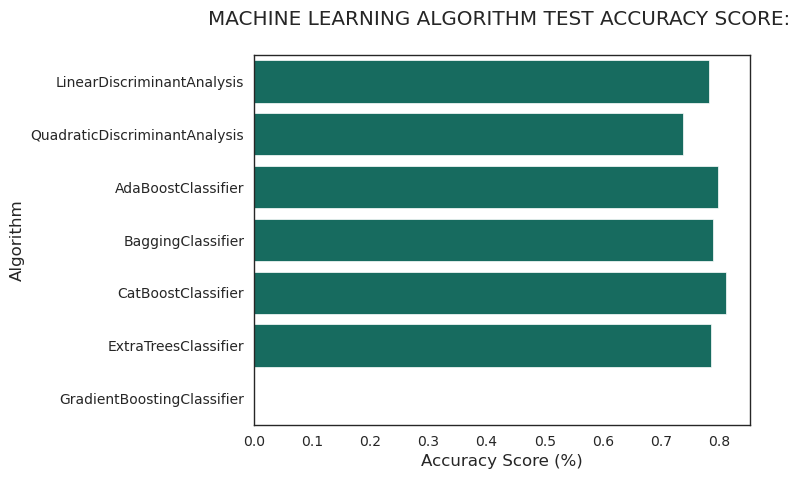

In [ ]:
sns.barplot(x='Best Score', y = 'Model', data = results_df, color = "#097969")

plt.title('MACHINE LEARNING ALGORITHM BEST SCORE After Hyperparameter Tuning: \n')
plt.xlabel('Best Accuracy Score (%)')
plt.ylabel('Algorithm')